In [1]:
import cv2
import tensorflow as tf
import os
import numpy as np
import network as net
from Training import openpose
from Training_mobilenet import openpose_mobile
import matplotlib.pyplot as plt
from scipy.ndimage.filters import maximum_filter
import math
from collections import Counter, defaultdict
import itertools
import matplotlib as mpl
import time
import ast
from scipy.ndimage.filters import gaussian_filter
import matplotlib

C:\Users\JAEKYU\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Open Pose Class Loading Finish
open pose mobilenet init end


In [2]:
def make_test_batch(img_path, batch_size):
    num_of_data = len(img_path)
    index = np.arange(0, num_of_data)
    np.random.shuffle(index)
    index = index[:batch_size]
    
    shuffled_img_data = [img_path[i] for i in index]
    
    return np.asarray(shuffled_img_data)

def path_to_image(img_path, batch_size):
    #buffer 선언
    image_data = np.zeros((batch_size, 356, 356, 3), np.uint8)
    
    index = 0
    for img in (img_path):
        #buffer = cv2.imread(img)
        #buffer = cv2.resize(buffer, (526, 526))
        #image_data[index] = buffer
        #index = index + 1
        #buffer = cv2.resize(buffer, (526, 526))

        image_data[index] = cv2.imread(img)
        index = index + 1

    return image_data

def load_test_data(save_path):
    img_path = save_path#"./MPII_Dataset/resized_test_image/"
    file_path = []
    file_list = os.listdir(img_path)
    for i in (file_list):
        file_path.append(img_path + i)
    return file_path

In [3]:
batch_size = 1
test_img_path = load_test_data("./MPII_Dataset/test_image_demo/")
test_image = "./MPII_Dataset/test_image_demo/11.jpg"
batch_img_path = make_test_batch(img_path = test_img_path, batch_size = batch_size)
batch_img = path_to_image(batch_img_path, batch_size)

In [4]:
with tf.Session() as sess:
    #obj = openpose(batch_size=1, sess = sess)
    obj = openpose(batch_size=1, sess = sess)
    heatmap, vectormap = obj.demo_test(batch_img)

test data load start
test data load finish
open pose init complete
INFO:tensorflow:Restoring parameters from C:/Users/JAEKYU/Documents/Jupyter Notebook/Open_Pose/Weight/Weight.ckpt
weight load


In [5]:
np.shape(heatmap)
#np.shape(np.squeeze(heatmap))

(1, 44, 44, 17)

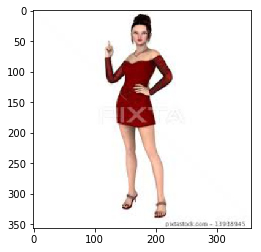

In [6]:
batch_img = batch_img.reshape([356, 356, 3])
oriImg = batch_img[:,:,[2,1,0]]
#preprocessed = preprocess(buffer, 356, 356)
#preprocessed = preprocessed[:, :, [2,1,0]]
plt.imshow(oriImg)
plt.show()

(1, 44, 44, 17)


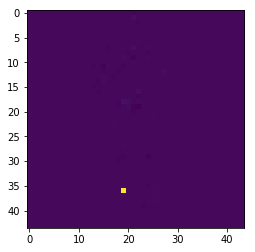

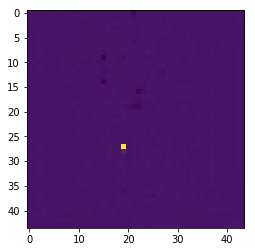

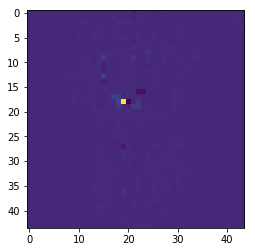

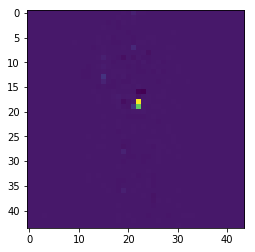

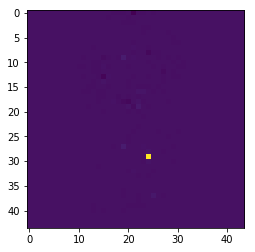

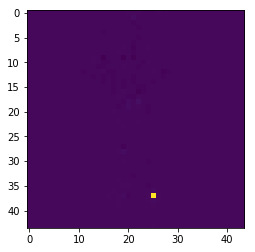

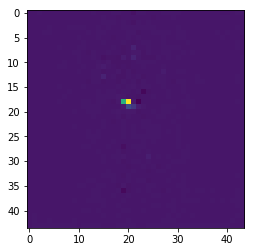

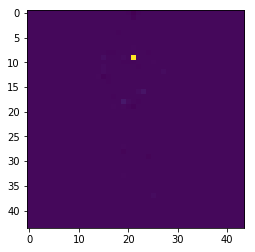

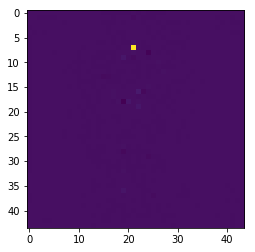

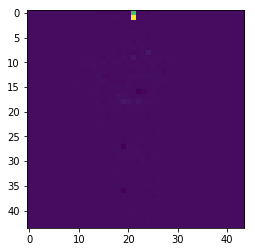

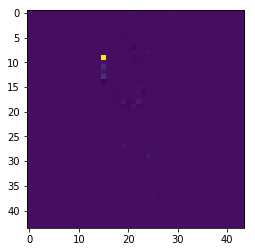

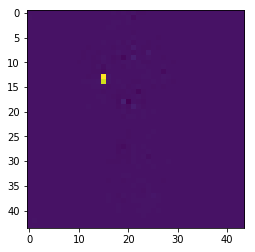

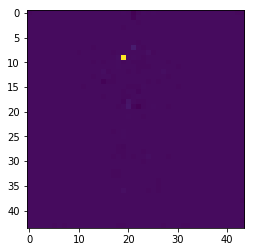

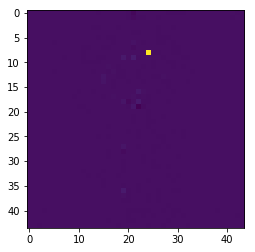

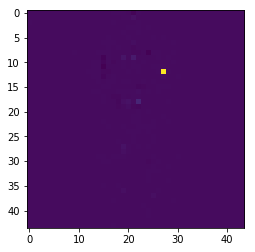

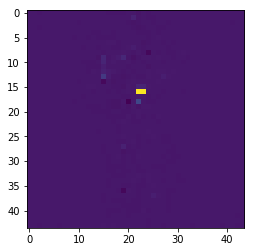

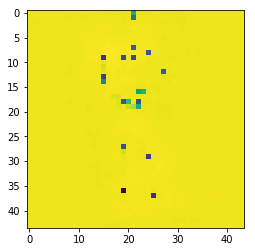

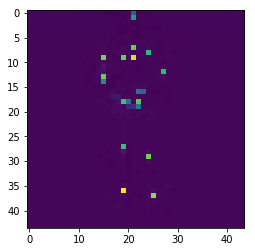

In [7]:
#heatmap
network_output_width_height = 44
print(np.shape(heatmap))
heatmap = np.squeeze(heatmap)
#heatmap -> 44,44,17
heatmap_buffer = np.transpose(heatmap, (2,0, 1))
#heatmap_buffer -> 17,44,44
resized_heatmap = np.zeros((17, 356, 356))

summed_heatmap = np.zeros((network_output_width_height, network_output_width_height))
for i in range(17):
    resized_heatmap[i] = cv2.resize(heatmap_buffer[i], (356, 356))
    plt.imshow(heatmap_buffer[i])#17,44,44
    plt.show()
for i in range(16):
    summed_heatmap = summed_heatmap + heatmap_buffer[i]
plt.imshow(summed_heatmap)
plt.show()
summed_heatmap = cv2.resize(summed_heatmap, (356, 356))
#cv2.imshow("heatmap", summed_heatmap)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


0


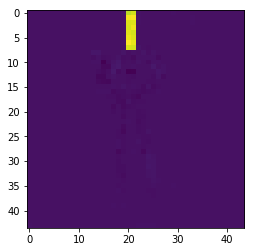

1


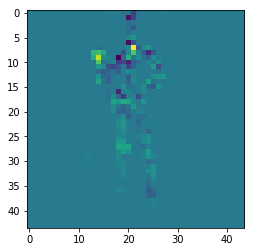

2


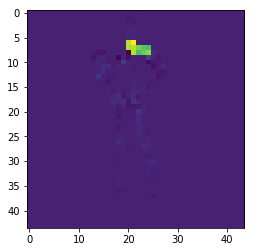

3


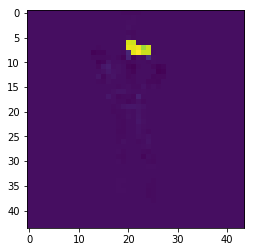

4


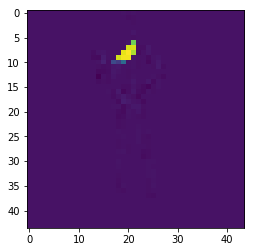

5


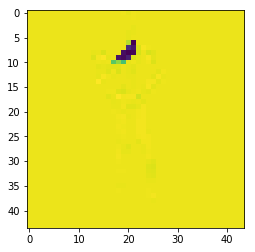

6


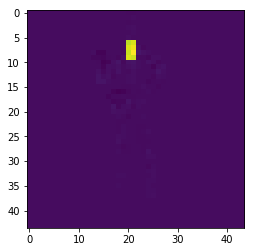

7


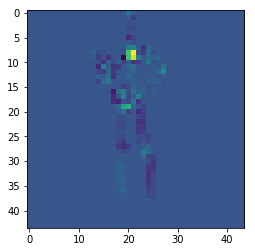

8


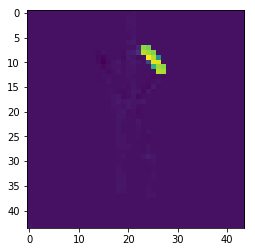

9


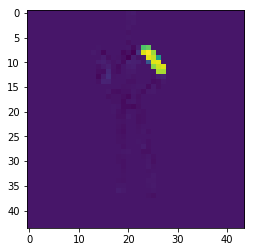

10


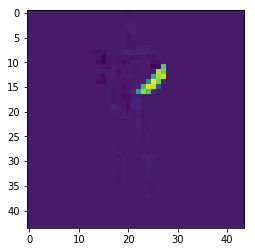

11


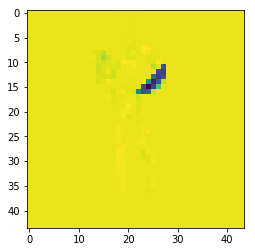

12


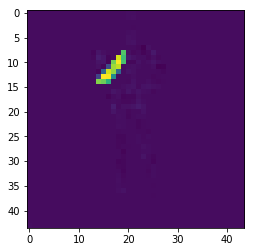

13


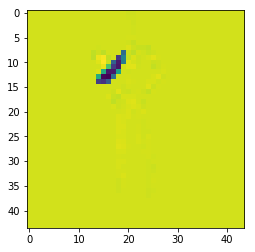

14


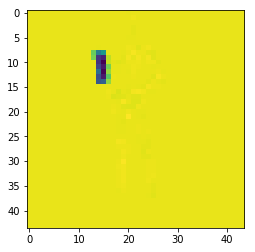

15


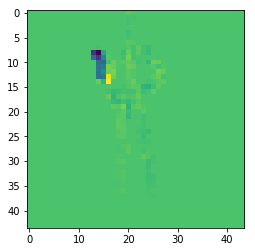

16


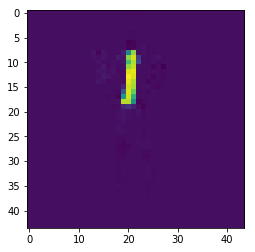

17


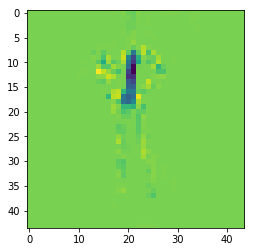

18


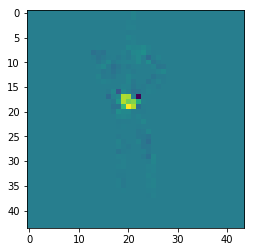

19


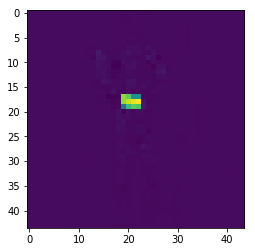

20


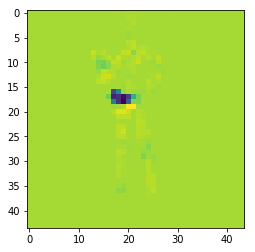

21


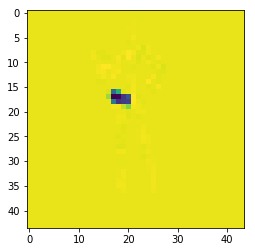

22


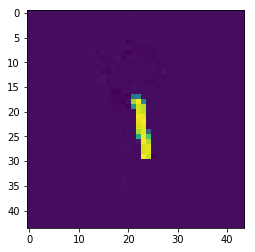

23


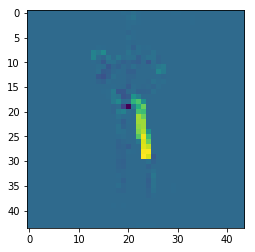

24


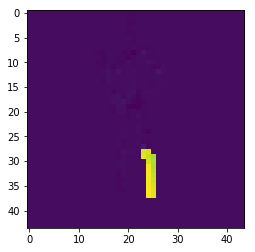

25


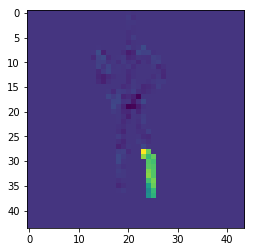

26


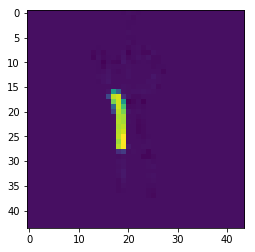

27


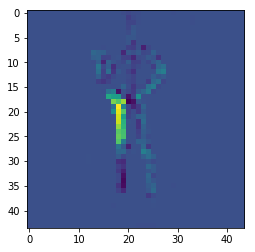

28


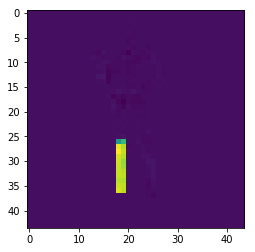

29


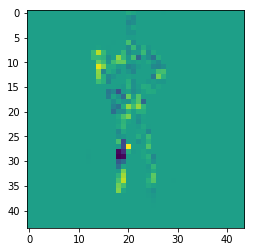

30


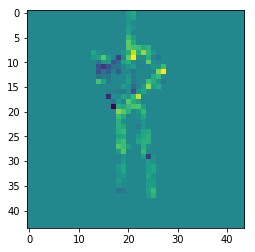

31


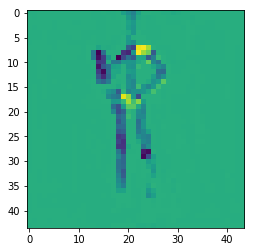

32


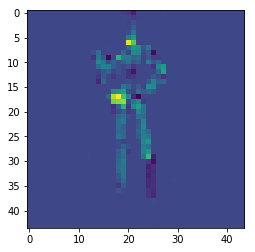

33


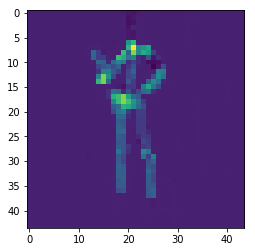

summed vectormap


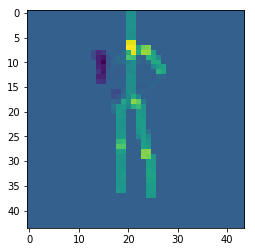

In [8]:
#vectormap
vectormap = vectormap.reshape([network_output_width_height, network_output_width_height, 34])
vectormap_buffer = np.transpose(vectormap, (2,0, 1))
resized_vectormap = np.zeros((34, 356, 356))
summed_vectormap = np.zeros((network_output_width_height, network_output_width_height))
for i in range(34):
    print(i)
    plt.imshow(vectormap_buffer[i])#34,44,44
    resized_vectormap[i] = cv2.resize(vectormap_buffer[i], (356,356))
    
    plt.show()
nt_vectormap = np.transpose(resized_vectormap, (1, 2, 0))
for i in range(34):
    summed_vectormap = summed_vectormap + vectormap_buffer[i]
print("summed vectormap")
plt.imshow(summed_vectormap)
plt.show()
summed_vectormap = cv2.resize(summed_vectormap, (356, 356))
#cv2.imshow("vectormap", summed_vectormap)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [9]:
transposed_resized_heatmap = np.transpose(resized_heatmap, [1, 2, 0])
print(np.shape(transposed_resized_heatmap))
print(np.shape(resized_heatmap))

(356, 356, 17)
(17, 356, 356)


In [10]:
heatmap_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], 17))
paf_avg = np.zeros((oriImg.shape[0], oriImg.shape[1], 34))


heatmap_avg = heatmap_avg + transposed_resized_heatmap
paf_avg = paf_avg + nt_vectormap

In [11]:
"""
[(12, 11), (11, 10), (13, 14), (14, 15)]
0 - r_ankle
1 - r_knee
2 - r_hip
3 - l_hip
4 - l_knee
5 - l_ankle
6 - pelvis
7 - thorax
8 - upper neck
9 - head top
10 - r_wrist
11 - r_elbow
12 - r_sholder
13 - l_sholder
14 - l_elbow
15 - l_wrist
16 - back_ground
"""

'\n[(12, 11), (11, 10), (13, 14), (14, 15)]\n0 - r_ankle\n1 - r_knee\n2 - r_hip\n3 - l_hip\n4 - l_knee\n5 - l_ankle\n6 - pelvis\n7 - thorax\n8 - upper neck\n9 - head top\n10 - r_wrist\n11 - r_elbow\n12 - r_sholder\n13 - l_sholder\n14 - l_elbow\n15 - l_wrist\n16 - back_ground\n'

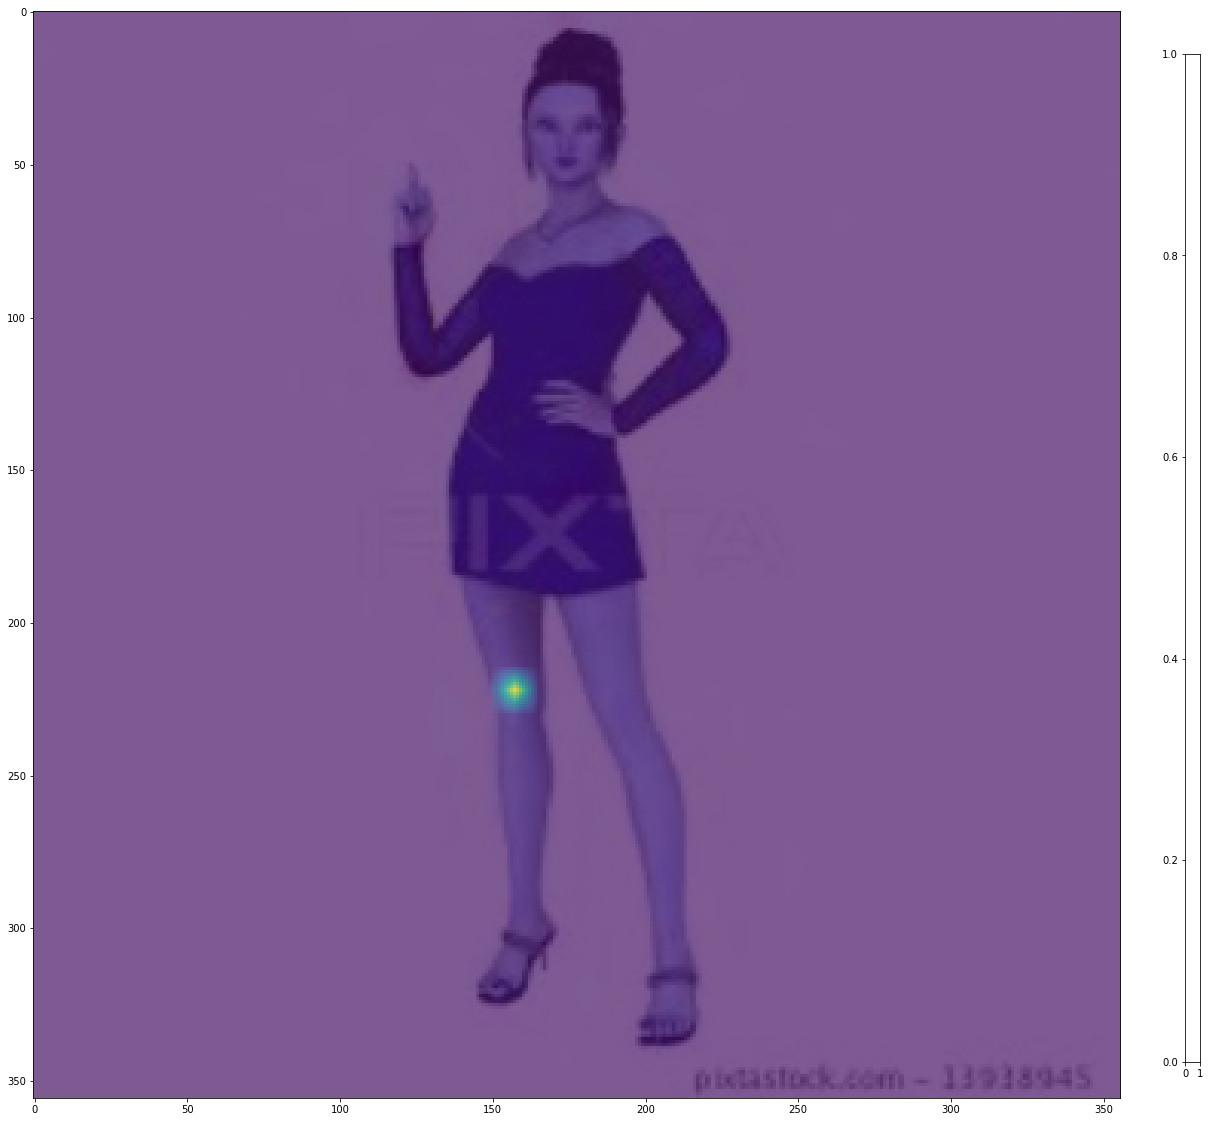

In [12]:
plt.imshow(oriImg[:,:,[2,1,0]])
plt.imshow(heatmap_avg[:,:,1], alpha=.7)#alpha -> 이미지 얼마나 선명한가. heatmap_avg[:,:,0] -> 1:r_knee
fig = matplotlib.pyplot.gcf()
cax = matplotlib.pyplot.gca()
fig.set_size_inches(20, 20)
fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
#_ = fig.colorbar(oriImg, cax=cbar_ax)

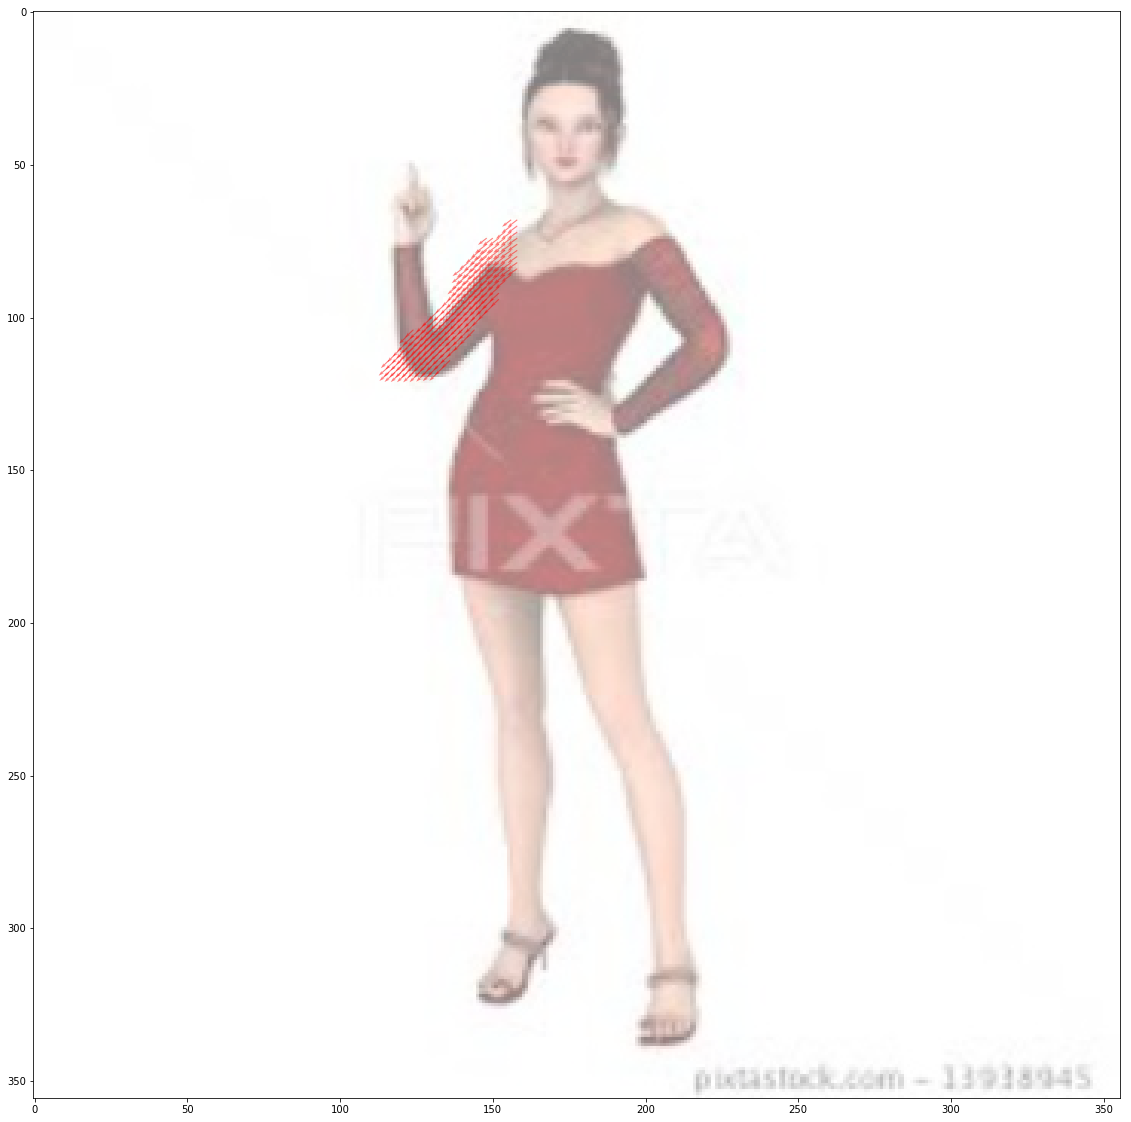

In [13]:
#22, 23 허벅지 vectormap
from numpy import ma
U = resized_vectormap[12]*(-1)
V = resized_vectormap[13]
#print(np.shape(U))
#print(np.shape(V))
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
#print(np.shape(X))
#print(np.shape(Y))
M = np.zeros(U.shape, dtype='bool')
#print(np.shape(M))
M[U**2 + V**2 < 0.5 * 0.5] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

plt.figure()
plt.imshow(oriImg, alpha = .5)
s = 2
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)

In [14]:
all_peaks = []
peak_counter = 0

for part in range(17-1):
    map_ori = heatmap_avg[:,:,part]
    map = gaussian_filter(map_ori, sigma=3)
    
    map_left = np.zeros(map.shape)
    #print(np.shape(map_left))
    map_left[1:,:] = map[:-1,:]
    map_right = np.zeros(map.shape)
    map_right[:-1,:] = map[1:,:]
    map_up = np.zeros(map.shape)
    map_up[:,1:] = map[:,:-1]
    map_down = np.zeros(map.shape)
    map_down[:,:-1] = map[:,1:]
    
    peaks_binary = np.logical_and.reduce((map>=map_left, map>=map_right, map>=map_up,\
                                          map>=map_down, map > 0.1))#0.1
    peaks = list(zip(np.nonzero(peaks_binary)[1], np.nonzero(peaks_binary)[0])) # note reverse
    peaks_with_score = [x + (map_ori[x[1],x[0]],) for x in peaks]
    id = range(peak_counter, peak_counter + len(peaks))
    peaks_with_score_and_id = [peaks_with_score[i] + (id[i],) for i in range(len(id))]

    all_peaks.append(peaks_with_score_and_id)
    peak_counter += len(peaks)

In [15]:
limbSeq = [(9, 8), (8, 13), (8, 12), (8, 7), (12, 11), (11, 10), (13, 14), (14, 15), \
           (7, 6), (6, 3),  (3, 4),  (4, 5), (6, 2),   (2, 1),   (1, 0)]#16개 조인트, 15개 limb

mapIdx = [(16, 17), (18, 19), (20, 21), (22, 23), (28, 29), (30, 31), (24, 25), (26, 27), (32, 33),\
          (34, 35), (38, 39), (40, 41), (36, 37), (42, 43), (44, 45)]

In [16]:
connection_all = []
special_k = []
mid_num = 10###########################################################################################
#paf_avg = resized_vectormap
for k in range(len(mapIdx)):
    score_mid = paf_avg[:,:,[x-17 for x in mapIdx[k]]]
    #print("score_mid : ",np.shape(score_mid))
    candA = all_peaks[limbSeq[k][0]]#all_peaks[limbSeq[k][0]-1]#157
    candB = all_peaks[limbSeq[k][1]]#all_peaks[limbSeq[k][1]-1]#246
    #candA : [(182, 68, 0.8127860426902771, 9)]
    #candB :[(173, 92, 0.8721999526023865, 8)]
    #print("candA, candB : ",candA, candB)
    nA = len(candA)
    nB = len(candB)
    #print("nA, nB : ", nA, nB)
    indexA, indexB = limbSeq[k]
    #print("indexA, indexB : ", indexA, indexB)
    if(nA != 0 and nB != 0):
        connection_candidate = []
        for i in range(nA):
            for j in range(nB):
                vec = np.subtract(candB[j][:2], candA[i][:2])
                norm = math.sqrt(vec[0]*vec[0] + vec[1]*vec[1])
                # failure case when 2 body parts overlaps
                if norm == 0:
                    continue
                vec = np.divide(vec, norm)
                
                startend = list(zip(np.linspace(candA[i][0], candB[j][0], num=mid_num), \
                               np.linspace(candA[i][1], candB[j][1], num=mid_num)))
                #print("startend : ",startend)
                vec_x = np.array([score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 0] \
                                  for I in range(len(startend))])

                vec_y = np.array([score_mid[int(round(startend[I][1])), int(round(startend[I][0])), 1] \
                                  for I in range(len(startend))])

                score_midpts = np.multiply(vec_x, vec[0]) + np.multiply(vec_y, vec[1])
                score_with_dist_prior = sum(score_midpts)/len(score_midpts) + min(0.5*oriImg.shape[0]/norm-1, 0)
                #print("score_midpts : ", score_midpts)
                criterion1 = len(np.nonzero(score_midpts > 0.0001)[0]) > 0.00005 * len(score_midpts)
                #print("score_with_dist_prior : ", score_with_dist_prior)
                criterion2 = score_with_dist_prior > 0.1
                #print("criterion1, criterion2 : ", criterion1, criterion2)
                if criterion1 and criterion2:
                    #print("1")
                    connection_candidate.append([i, j, score_with_dist_prior, score_with_dist_prior+candA[i][2]+candB[j][2]])
        #print("connection_candidate : ", connection_candidate)
        connection_candidate = sorted(connection_candidate, key=lambda x: x[2], reverse=True)
        connection = np.zeros((0,5))
        #print("connection_candidate : ", connection_candidate)
        for c in range(len(connection_candidate)):
            i,j,s = connection_candidate[c][0:3]
            if(i not in connection[:,3] and j not in connection[:,4]):
                connection = np.vstack([connection, [candA[i][3], candB[j][3], s, i, j]])
                if(len(connection) >= min(nA, nB)):
                    break
        #print("connection : ", connection)
        connection_all.append(connection)
    else:
        special_k.append(k)
        connection_all.append([])

In [17]:
subset = -1 * np.ones((0, 20))######################################################
#print("subset1 : ", subset)
candidate = np.array([item for sublist in all_peaks for item in sublist])
#print("candidate : ", candidate)
#print("all_peaks : ", all_peaks)
for k in range(len(mapIdx)):
    #print("--------------------------------------------")
    #print("k : ", k)
    #print("special_k : ", special_k)
    if k not in special_k:
        #print("k is not in special_k : ",k)
        partAs = connection_all[k][:,0]
        partBs = connection_all[k][:,1]
        indexA, indexB = np.array(limbSeq[k]) - 1
        
        #print("connection_all : ",connection_all)
        #print("connection_all[k] : ",connection_all[k])
        for i in range(len(connection_all[k])): #= 1:size(temp,1)
            #print("hello")
            found = 0
            subset_idx = [-1, -1]
            #print("subset's length :", len(subset))
            for j in range(len(subset)): #1:size(subset,1):
                #print("subset3 : ", subset)
                if subset[j][indexA] == partAs[i] or subset[j][indexB] == partBs[i]:
                    subset_idx[found] = j
                    found += 1
            #print("found : ",found)
            if found == 1:
                j = subset_idx[0]
                if(subset[j][indexB] != partBs[i]):
                    subset[j][indexB] = partBs[i]
                    subset[j][-1] += 1
                    subset[j][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]
            elif found == 2: # if found 2 and disjoint, merge them
                j1, j2 = subset_idx
                #print ("found = 2")
                membership = ((subset[j1]>=0).astype(int) + (subset[j2]>=0).astype(int))[:-2]
                if len(np.nonzero(membership == 2)[0]) == 0: #merge
                    subset[j1][:-2] += (subset[j2][:-2] + 1)
                    subset[j1][-2:] += subset[j2][-2:]
                    subset[j1][-2] += connection_all[k][i][2]
                    subset = np.delete(subset, j2, 0)
                else: # as like found == 1
                    subset[j1][indexB] = partBs[i]
                    subset[j1][-1] += 1
                    subset[j1][-2] += candidate[partBs[i].astype(int), 2] + connection_all[k][i][2]

            # if find no partA in the subset, create a new subset
            elif not found and k < 17:
                row = -1 * np.ones(20)
                row[indexA] = partAs[i]
                row[indexB] = partBs[i]
                row[-1] = 2
                row[-2] = sum(candidate[connection_all[k][i,:2].astype(int), 2]) + connection_all[k][i][2]
                subset = np.vstack([subset, row])
#print("end~",subset)

In [18]:
# delete some rows of subset which has few parts occur
#deleteIdx = [];
#print(subset)
#for i in range(len(subset)):
    #print("subset[i][-1] : ", subset[i][-1])
    #print("subset[i][-2]/subset[i][-1] : ",subset[i][-2]/subset[i][-1])
    #if subset[i][-1] < 1 or subset[i][-2]/subset[i][-1] < 0.1:#0.1
    #   deleteIdx.append(i)
    #    print(i)
#subset = np.delete(subset, deleteIdx, axis=0)
#print(subset)

In [22]:
all_peaks

[[(157, 295, 0.9221762418746948, 0)],
 [(157, 222, 0.6235138773918152, 1)],
 [(157, 149, 0.3298872709274292, 2)],
 [(181, 152, 0.45627522468566895, 3)],
 [(198, 238, 0.7056976556777954, 4)],
 [(206, 303, 0.7485961318016052, 5)],
 [(164, 150, 0.3403596878051758, 6)],
 [(173, 76, 0.7609682083129883, 7)],
 [(173, 60, 0.6026080250740051, 8)],
 [(173, 9, 0.4402564465999603, 9)],
 [(125, 76, 0.7433794140815735, 10)],
 [(125, 112, 0.5525593161582947, 11)],
 [(157, 76, 0.6258777976036072, 12)],
 [(198, 68, 0.6167182326316833, 13)],
 [(222, 101, 0.6375885009765625, 14)],
 [(186, 133, 0.40287071466445923, 15)]]

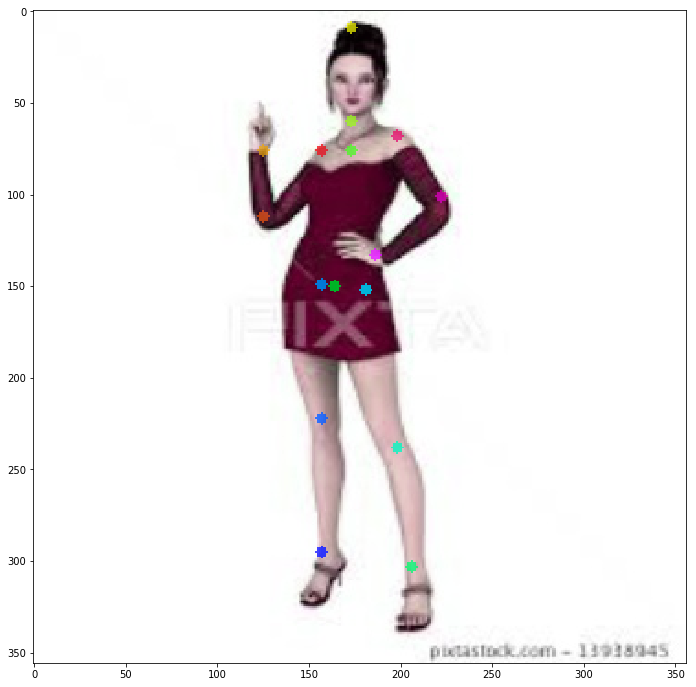

In [21]:
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cmap = matplotlib.cm.get_cmap('hsv')

canvas = cv2.imread(test_image) # B,G,R order

for i in range(16):
    rgba = np.array(cmap(1 - i/16. - 1./32))
    rgba[0:3] *= 255
    
    for j in range(len(all_peaks[i])):
        cv2.circle(canvas, all_peaks[i][j][0:2], 3, colors[i], thickness=-1)

to_plot = cv2.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

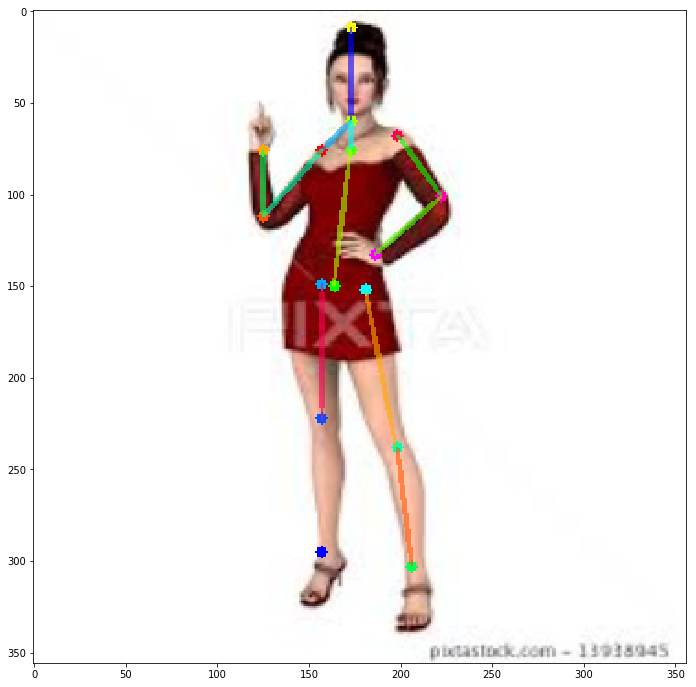

In [20]:
stickwidth = 1

for i in range(15):
    for n in range(len(subset)):
        index = subset[n][np.array(limbSeq[i])-1]
        #print("index : ", index)
        if -1 in index:
            continue
        #print("hello")
        cur_canvas = canvas.copy()
        Y = candidate[index.astype(int), 0]
        X = candidate[index.astype(int), 1]
        mX = np.mean(X)
        mY = np.mean(Y)
        length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
        angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
        polygon = cv2.ellipse2Poly((int(mY),int(mX)), (int(length/2), stickwidth), int(angle), 0, 360, 1)
        cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
        canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
        
plt.imshow(canvas[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)